# Summaries of Tajima's D, etc., over time

In [9]:
%matplotlib inline
%pylab inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [10]:
import glob

Things to compute:

* Find loci that have only had sweeps from standing variation
* Find loci that have only had sweeps from new mutations after optimum shift
* Find loci that did not contribute to adaptation at all

Statistics:

* Number of loci involved in adaptation as fxn of mutation rate, optimum value?


### Number of loci involved in adaptation

In [26]:
x=pd.read_hdf('tenLocusPopgenMeans.h5')
x['scaled_time']=x.generation.subtract(100000.).divide(4e4)

In [28]:
xg=x.groupby(['mu','opt'])

In [29]:
linestyles=['solid','dashed','dotted']
linecolors = [ plt.cm.viridis(f) for f in np.linspace(0.1,0.9, 3) ]
styles = dict()
colors = dict()
I=0
for i in x.mu.unique():
    colors[i]=linecolors[I]
    I+=1
I=0
for i in x.opt.unique():
    styles[i]=linestyles[I]
    I+=1

{'0.1': 'solid', '1': 'dotted', '0.5': 'dashed'}
{'0.005': (0.74138800000000005, 0.87344900000000003, 0.149561, 1.0), '0.001': (0.12756799999999999, 0.56694900000000004, 0.55055600000000005, 1.0), '0.00025': (0.28262300000000001, 0.140926, 0.45751700000000001, 1.0)}


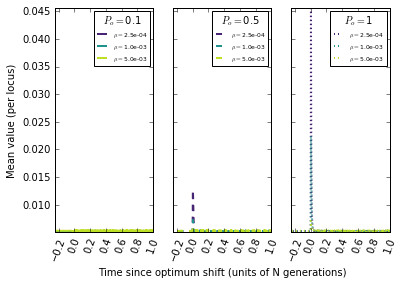

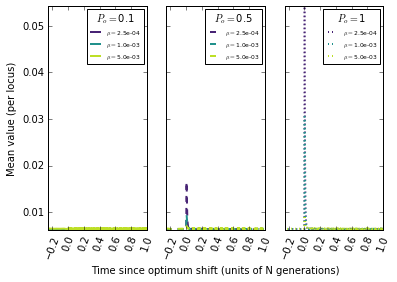

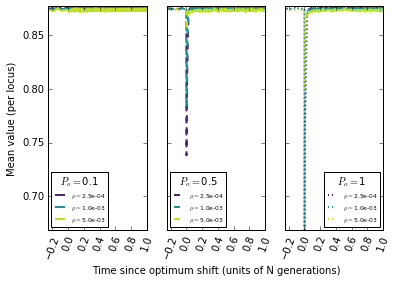

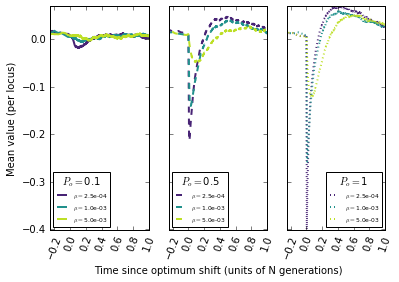

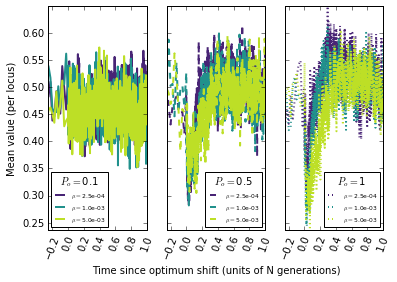

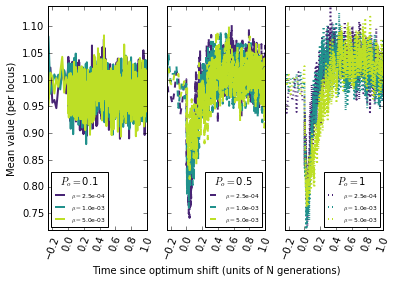

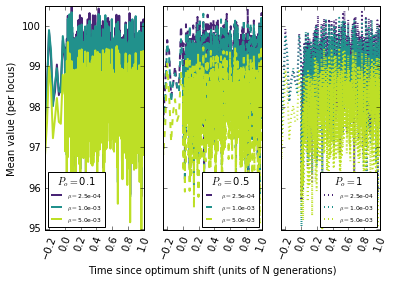

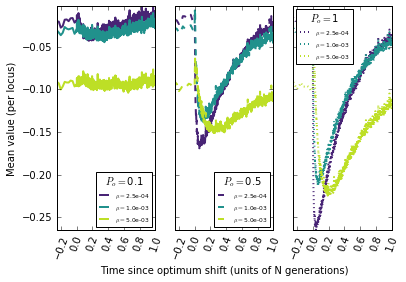

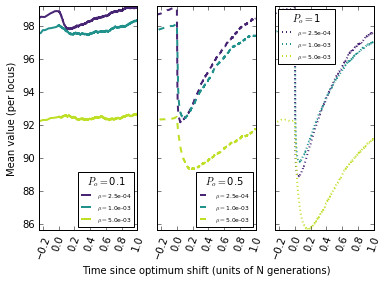

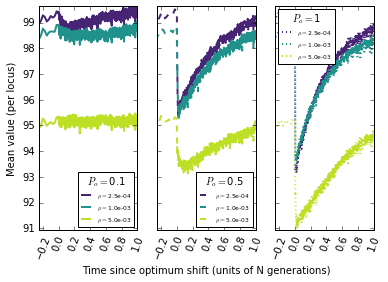

In [86]:
for stat in x.variable.unique():
    fig=plt.figure()
    lo=plt.subplot2grid((1,3),(0,0))
    mid=plt.subplot2grid((1,3),(0,1),sharex=lo,sharey=lo)
    hi=plt.subplot2grid((1,3),(0,2),sharex=lo,sharey=lo)
    splots=[lo,mid,hi]
    maxStat=x[(x.variable==stat) & (x.scaled_time > -0.1) & (x.scaled_time <1)].max().value
    minStat=x[(x.variable==stat) & (x.scaled_time > -0.1) & (x.scaled_time <1)].min().value
    for n,g in xg:
        SPLOT=0
        if n[1]=="0.5":
            SPLOT=1
        elif n[1]=="1":
            SPLOT=2
        splots[SPLOT].plot(g[g.variable==stat].scaled_time,
                           g[g.variable==stat].value,
                           label=r'$\mu = $'+'{0:0.1e}'.format(float(n[0])),
                           #linestyle=styles[n[1]],
                           color=colors[n[0]],
                           linewidth=2)
        splots[SPLOT].legend(loc='best',fontsize=6,title=r'$P_o = $'+n[1])
    for i in splots:
        #i.set_xlim(-0.25,1)
        #i.set_ylim(minStat,maxStat)
        
        labels=i.get_xticklabels()
        plt.setp(labels, rotation=70)# fontsize=10)
    lo.set_xlim(-0.25,1.0)
    lo.set_ylim(minStat,maxStat)
    plt.setp(mid.get_yticklabels(),visible=False)
    plt.setp(hi.get_yticklabels(),visible=False)
    #mid.set_title(stat)
    mid.set_xlabel("Time since optimum shift (units of N generations)")
    lo.set_ylabel("Mean value (per locus)")
    plt.gcf().subplots_adjust(bottom=0.225)
    fname=stat+'.tif'
    plt.savefig(fname,dpi=600)
    #plt.tight_layout()